In [2]:
import requests
import json
import time
import hashlib
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
import os
%matplotlib inline


def check_file_path_exist(csvName):
    if not os.path.exists(os.path.dirname(csvName)):
        try:
            os.makedirs(os.path.dirname(csvName))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
                
def get_datetime_from_timeString(date_string):
    date_string = date_string.replace('T',' ').replace('Z','')
    datetime_object = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S.%f')
    return datetime_object

def get_two_datetime_delta(datetime_object1 , datetime_object2):
    datetime_delta   = datetime_object2 - datetime_object1
    return datetime_delta.total_seconds()



In [3]:
# ID	MAC	Location
# 1	0D0100D9	L1
# 2	0D0100DC	M1
# 3	0D0100B5	R1
# 4	0D0100B8	L2
# 5	0D01019A	M2
# 6	0D0100C0	R2
# 7	0D0100E4	L3
# 8	0D0100CB	M3
# 9		R3
# 10	0D0100A3	L4
# 11	0D0101E4	M4
# 12	0D0100CC	R4
# 13	0D0100DA	L5
# 14	0D010119	M5
# 15	0D0101EB	R5

In [4]:
mac_gemtek = "101a"
mac_list = ["0d01019a","0d0100cc","0d0100dc","0d0100b5","0d0100d9","0d0100cb",
    "0d0100b8","0d0100da","0d010119","0d0101eb","0d0100a3","0d0100e4","0d0100c0", "0d0101e4" ]
mac_query_list = [mac_gemtek + f for f in  mac_list]
matrix_list = ["0d01019a","0d0100cc","0d0100dc","0d0100b5","0d0100d9","0d0100cb",
    "0d0100b8","0d0100da","0d010119","0d0101eb","0d0100a3","0d0100e4","0d0100c0", "0d0101e4" ]

folderName = os.getcwd() + '/0810_MatrixALL/'
csvFiles = [f for f in listdir(folderName) if isfile(join(folderName, f)) and f[-3:] == "csv" ]
PraseType = "Foward1"
PraseFolderName = folderName + '/PraseType/'

MatrixID = ["L1","M1", "R1", 
            "L2","M2", "R2",
            "L3","M3", "R3",
            "L4","M4", "R4",
            "L5","M5", "R5"]
csvFiles = ['test_Node_101a0d0100d9.csv','test_Node_101a0d0100dc.csv','test_Node_101a0d0100b5.csv',
            'test_Node_101a0d0100b8.csv','test_Node_101a0d01019a.csv','test_Node_101a0d0100c0.csv',
            'test_Node_101a0d0100e4.csv','test_Node_101a0d0100cb.csv','',
            'test_Node_101a0d0100a3.csv','test_Node_101a0d0101e4.csv','test_Node_101a0d0100cc.csv',
            'test_Node_101a0d0100da.csv','test_Node_101a0d010119.csv','test_Node_101a0d0101eb.csv'
           ]

Create Folder: /Users/MH/SourceTreeproject/ML_DL_Learning/Gemtek/0810_MatrixALL/CAR_ClotPlus/Front50/
Node: L1  - data in this time: 37 data lose: 29  rate: 43.49999999999999
Node: M1  - data in this time: 22 data lose: 44  rate: 65.99999999999999
Node: R1  - data in this time: 40 data lose: 26  rate: 38.99999999999999
Node: L2  - data in this time: 47 data lose: 19  rate: 28.499999999999996
Node: M2  - data in this time: 32 data lose: 34  rate: 51.0
Node: R2  - data in this time: 30 data lose: 36  rate: 53.99999999999999
Node: L3  - data in this time: 38 data lose: 28  rate: 42.0
Node: M3  - data in this time: 48 data lose: 18  rate: 26.999999999999996
Node: L4  - data in this time: 28 data lose: 38  rate: 56.99999999999999
Node: M4  - data in this time: 34 data lose: 32  rate: 48.0
Node: R4  - data in this time: 37 data lose: 29  rate: 43.49999999999999
Node: L5  - data in this time: 16 data lose: 50  rate: 75.0
Node: M5  - data in this time: 34 data lose: 32  rate: 48.0
Node: R5  - 

IndexError: list index out of range

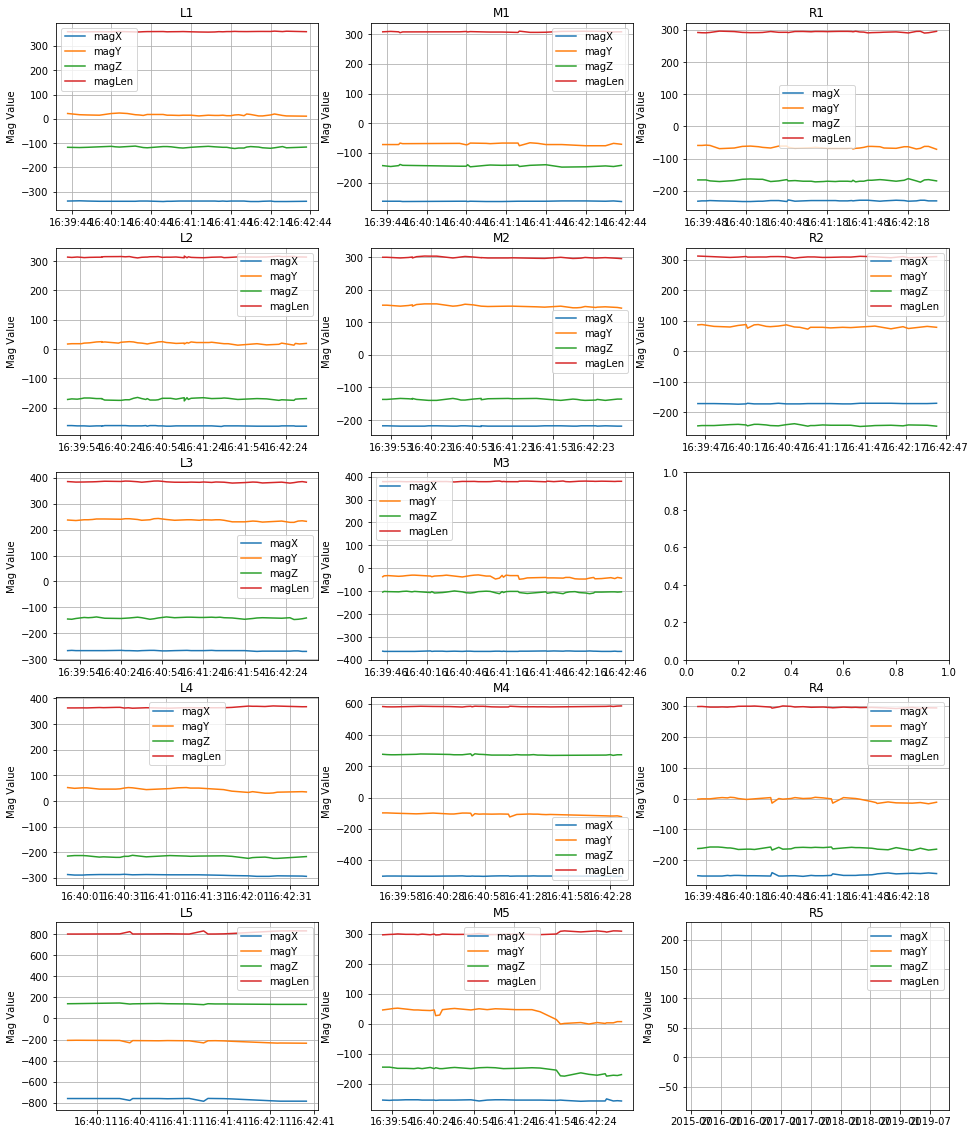

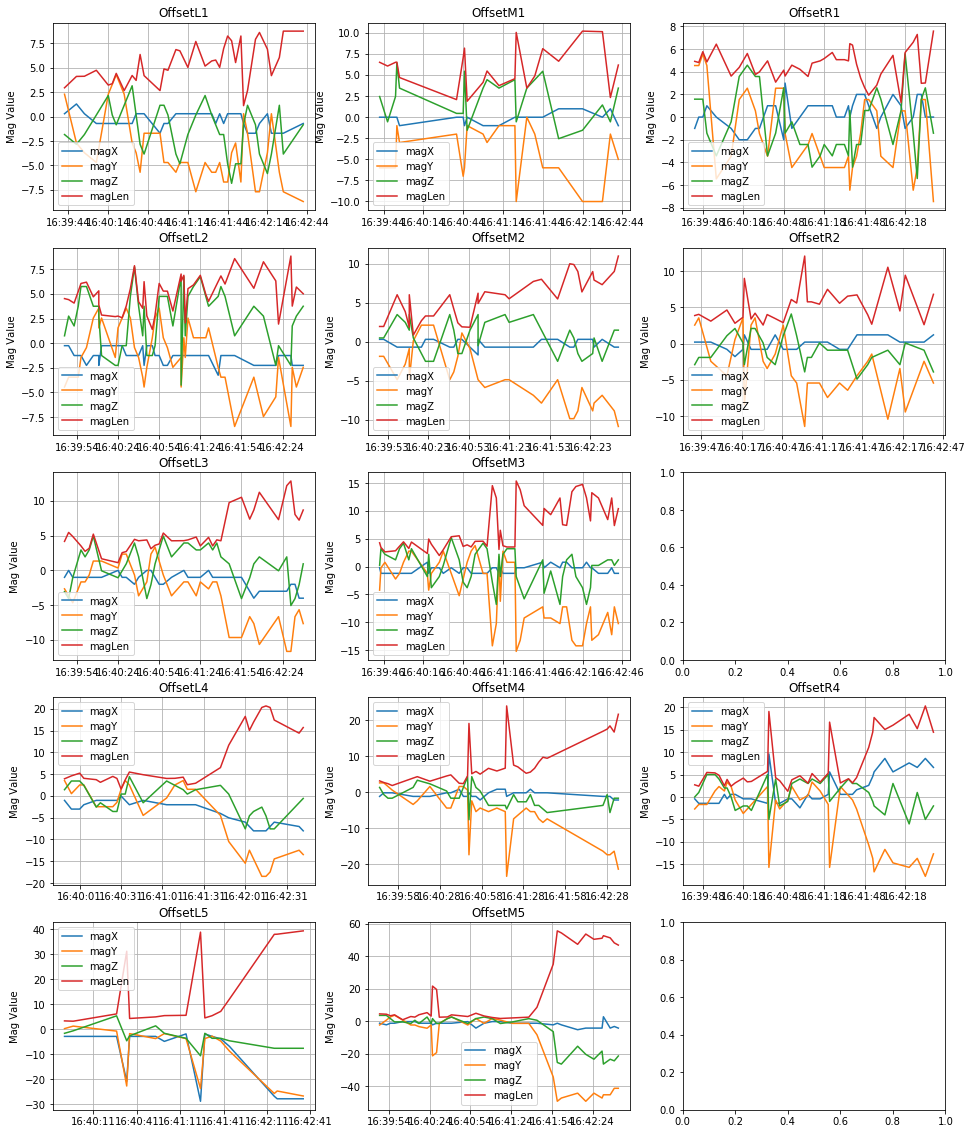

In [46]:
def fast_plot_line(figure, axis, index, time , x, y, z, length ,title, ylimit):
    indexRow = int(index/3)
    indexCol = int(index%3)
    axis[indexRow][indexCol].plot()
    axis[indexRow][indexCol].plot(time, x, label='magX')
    axis[indexRow][indexCol].plot(time, y, label='magY')
    axis[indexRow][indexCol].plot(time, z, label='magZ')
    axis[indexRow][indexCol].plot(time, length, label='magLen')
#     axis[index][0].set_xlabel('Time')
    axis[indexRow][indexCol].set_ylabel('Mag Value')
    axis[indexRow][indexCol].set_title(title)
    axis[indexRow][indexCol].legend()
    axis[indexRow][indexCol].grid()
    if ylimit:
        axis[index].set_ylim([-100, 100])
    return None

def plot_basic_plot(count, magX, magY, magZ, title):
    plt.figure()
    plt.plot(count, magX, label='magX')
    plt.plot(count, magY, label='magY')
    plt.plot(count, magZ, label='magZ')
    plt.xlabel('Time')
    plt.ylabel('Mag Value')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

def get_secific_time_data(data, ex_start_time, ex_end_time ,offset = 0):
    data = data.loc[df['timestamp'] >= ex_start_time ]
    data = data.loc[df['timestamp'] <= ex_end_time]
    data = data.drop_duplicates(['frameCnt'])
    return data

# CarFolder = "/CAR_RV"
# CarFolder = "/CAR_Ford"
CarFolder = "/CAR_ClotPlus"

# prseFolder = "/F1/"
# prseFolder = "/B1/"
# prseFolder = "/F2/"
# prseFolder = "/B2/"
# prseFolder = "/R70/"
# prseFolder = "/R50/"
# prseFolder = "/Back70/"
# prseFolder = "/Back50/"
# prseFolder = "/Front70/"
prseFolder = "/Front50/"

EnvFolder = "/Env/"
folderName = os.getcwd() + '/0810_MatrixALL/'
folderEnvNmae = os.getcwd() + '/0810_MatrixALL' + CarFolder + EnvFolder
folderPraseNmae = os.getcwd() + '/0810_MatrixALL' + CarFolder + prseFolder
check_file_path_exist(folderEnvNmae)
check_file_path_exist(folderPraseNmae)

################# env ################
env_start_time = 1502353592
env_end_time = 1502353792
env_point = int(env_end_time - env_start_time)/3

################# experiment ################
UTC_offset = 60*60*8
ex_start_time = 1502354381
ex_end_time = 1502354564
ex_point = int(env_end_time - env_start_time)/3

# Experiment_type	Car_type	start_time	end_time

# Front70	ClotPlus	1502354564	1502354714
# Front50	ClotPlus	1502354381	1502354564

f, ax = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
# f.tight_layout()


############# ENV value ################
# print("Create Folder:", folderEnvNmae)
# Env_mag_array = list()
# index = 0
# for csv in csvFiles:
# # df = pd.read_csv(folderName + csvFiles[0])
#     if(len(csv)):
#         df = pd.read_csv(folderName + csv)
#         dfenv = get_secific_time_data(df, env_start_time, env_end_time)
#         dfenvlen = len(dfenv)
#         losepoint = int(env_point - dfenvlen)
#         loserate = losepoint / env_point *100
#         print("Node:", MatrixID[index], " - data in this time:", dfenvlen, "data lose:", losepoint, " rate:", loserate )
    
#         if (len(dfenv)):
#             EnvMagX = dfenv.magX.mean()
#             EnvMagY = dfenv.magY.mean()
#             EnvMagZ = dfenv.magZ.mean()
#             EnvMagLen = dfenv.mag_len.mean()
#             dfenv["count"] = pd.to_datetime((dfenv['timestamp'] +UTC_offset).astype(int),unit='s')
#             dfenv["magX_of"] = dfenv.magX - EnvMagX
#             dfenv["magY_of"] = dfenv.magY - EnvMagY
#             dfenv["magZ_of"] = dfenv.magZ - EnvMagZ
#             dfenv["magLen_of"] = (dfenv["magX_of"].pow(2) + dfenv["magY_of"].pow(2) + dfenv["magZ_of"].pow(2) ).pow(0.5)
#             fast_plot_line(f, ax, index, dfenv["count"] , dfenv["magX_of"],  dfenv["magY_of"], dfenv["magZ_of"], 
#                            dfenv["magLen_of"] , 'Env_' + MatrixID[index], ylimit = None)
#     #         plot_basic_plot(count, magX, magY, magZ, "Env_" + MatrixID[index] )
#             dfenv.to_csv(folderEnvNmae + csv)
#             Env_mag_array.append([EnvMagX, EnvMagY ,EnvMagZ])
#         else:
#             print(csv, " doesn't contain this time data")
#     else:
#         Env_mag_array.append([0, 0 ,0])
#     index += 1
# imageName = folderEnvNmae + "Matrix.png"
# f.savefig(imageName ,bbox_inches='tight', dpi=200)

############# the other ####################   
# Raw data
index = 0
print("Create Folder:", folderPraseNmae)
for csv in csvFiles:
# df = pd.read_csv(folderName + csvFiles[0])
    if(len(csv)):
        df = pd.read_csv(folderName + csv)
        dfenv = get_secific_time_data(df, ex_start_time, ex_end_time)
        dfenvlen = len(dfenv)
        losepoint = int(ex_point - dfenvlen)
        loserate = losepoint / ex_point *100
        print("Node:", MatrixID[index], " - data in this time:", dfenvlen, "data lose:", losepoint, " rate:", loserate )
    
        if (len(dfenv)):
            dfenv["count"] = pd.to_datetime((dfenv['timestamp'] +UTC_offset).astype(int),unit='s')
            fast_plot_line(f, ax, index, dfenv["count"] , dfenv["magX"],  dfenv["magY"], dfenv["magZ"], 
                           dfenv["mag_len"] , '' + MatrixID[index], ylimit = None)
    #         plot_basic_plot(count, magX, magY, magZ, "Env_" + MatrixID[index] )
#             dfenv.to_csv(folderPraseNmae + csv)
        else:
            print(csv, " doesn't contain this time data")
            
    index += 1    
    
imageName = folderPraseNmae + "Matrix.png"
f.savefig(imageName ,bbox_inches='tight', dpi=200)

# Offset data
f, ax = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
index = 0
for csv in csvFiles:
# df = pd.read_csv(folderName + csvFiles[0])
    if(len(csv)):
        df = pd.read_csv(folderName + csv)
        dfenv = get_secific_time_data(df, ex_start_time, ex_end_time)
        dfenvlen = len(dfenv)
        losepoint = int(ex_point - dfenvlen)
        loserate = losepoint / ex_point *100
        print("Node:", MatrixID[index], " - data in this time:", dfenvlen, "data lose:", losepoint, " rate:", loserate )
    
        if (len(dfenv)):
            EnvMagX = Env_mag_array[index][0]
            EnvMagY = Env_mag_array[index][1]
            EnvMagZ = Env_mag_array[index][2]
            dfenv["count"] = pd.to_datetime((dfenv['timestamp'] +UTC_offset).astype(int),unit='s')
            dfenv["magX_of"] = dfenv.magX - EnvMagX
            dfenv["magY_of"] = dfenv.magY - EnvMagY
            dfenv["magZ_of"] = dfenv.magZ - EnvMagZ
            dfenv["magLen_of"] = (dfenv["magX_of"].pow(2) + dfenv["magY_of"].pow(2) + dfenv["magZ_of"].pow(2) ).pow(0.5)
            fast_plot_line(f, ax, index, dfenv["count"] , dfenv["magX_of"],  dfenv["magY_of"], dfenv["magZ_of"], 
                           dfenv["magLen_of"] , 'Offset' + MatrixID[index], ylimit = None)
    #         plot_basic_plot(count, magX, magY, magZ, "Env_" + MatrixID[index] )
            check_file_path_exist(folderPraseNmae + csv)
            dfenv.to_csv(folderPraseNmae + csv)
        else:
            print(csv, " doesn't contain this time data")
            
    index += 1    
    
imageName = folderPraseNmae + "MatrixOffset.png"
f.savefig(imageName ,bbox_inches='tight', dpi=200)

In [15]:
Env_mag_array

[[-330.02564102564105, 15.692307692307692, -137.17948717948718],
 [-263.96923076923076, -66.41538461538461, -143.55384615384617],
 [-246.05882352941177, -68.50980392156863, -160.19607843137254],
 [-268.9718309859155, 14.070422535211268, -183.54929577464787],
 [-218.86666666666667, 153.5, -135.36666666666667],
 [-181.2258064516129, 83.79032258064517, -234.48387096774192],
 [-264.82, 241.26, -140.66],
 [-362.30864197530866, -31.85185185185185, -101.77777777777777],
 [0, 0, 0],
 [-313.30357142857144, 52.5, -243.64285714285714],
 [-502.27272727272725, -96.75, 276.54545454545456],
 [-297.3015873015873, -20.19047619047619, -133.6031746031746],
 [-747.3333333333334, -191.5, 136.83333333333334],
 [-254.925, 62.675, -139.35],
 [-83.73076923076923, 233.53846153846155, -49.0]]